# Bert-tiny noisy model fine-tuned by the clean data

In [ ]:
# for SCC jupyter
import os
os.environ["WANDB_DISABLED"] = "true"

In [1]:
# for google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
root_path = '/content/gdrive/My Drive/Common Data/CS505/project/'

## 1. Import the data file

In [3]:
import pandas as pd
import os
# should test if the number of df rows matches the number of txt rows
# some data files meet the problem:  
# such as twitter-2016train-A, should be 6000 examples, but some lines are read as one line

# data_path='./data/'
data_path='/content/gdrive/My Drive/Common Data/CS505/project/Subtask_A/'

train_files=[]
test_files=[]
for file in os.listdir(data_path):
    if file.startswith('twitter') and file.endswith('.txt'):
        temp_path=os.path.join(data_path,file)
        if file=='twitter-2016test-A.txt':
            test_files.append(temp_path)
        else:
            train_files.append(temp_path)


## 2. Preprocess the data

### 2.1 Delete the neutral twitters from the training data

In [4]:
import nltk
nltk.download('punkt')

df_train=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines
for file in train_files:
    df_temp=pd.read_csv(file,sep='\t',names=['id','sentiment','text','none'])
    for idx, text in enumerate(df_temp.text.values):
        tokens = nltk.word_tokenize(text)
        if len(tokens)>length_threshold:
            df_temp.drop(index=[idx])
    df_train=pd.concat([df_train,df_temp])
df_train=df_train[df_train.sentiment.isin(['negative','positive'])]
df_train

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,id,sentiment,text,none
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...,NaN
5,263722278712393728,positive,Tim Tebow may be availible ! Wow Jerry \u002c ...,NaN
6,262936443171778560,positive,@mariakaykay aga tayo tomorrow ah. :) Good nig...,NaN
8,262968617233162240,positive,Lunch from my new Lil spot ...THE COTTON BOWL ...,NaN
9,263790847424880641,positive,SNC Halloween Pr. Pumped. Let\u2019s work it f...,NaN
...,...,...,...,...
9678,101450548439560192,negative,@stoney16 @JeffMossDSR I'd recommend just turn...,NaN
9679,103158179306807296,positive,RT @MNFootNg It's monday and Monday Night Foot...,NaN
9680,103157324096618497,positive,All I know is the road for that Lomardi start ...,NaN
9682,104230318525001729,positive,@DariusButler28 Have a great game agaist Tam...,NaN


### 2.2 Delete the neutral twitters from the test data

In [5]:
df_test=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines
for file in test_files:
    df_temp=pd.read_csv(file,sep='\t',names=['id','sentiment','text','none'])
    for idx, text in enumerate(df_temp.text.values):
        tokens = nltk.word_tokenize(text)
        if len(tokens)>length_threshold:
            df_temp.drop(index=[idx])
    df_test=pd.concat([df_test,df_temp])
df_test=df_test[df_test.sentiment.isin(['negative','positive'])]
df_test
# should be 20633 rows, but get 20632 (?)

,id,sentiment,text,none
2,619971047195045888,negative,If these runway renovations at the airport pre...,NaN
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
5,619994586182619136,positive,"Excited to read ""Go Set a Watchman"" on Tuesday...",NaN
6,619998879447162881,positive,Watching Miss USA tomorrow JUST to see @Travis...,NaN
8,620013074272137216,positive,Call for reservations for lunch or dinner tomo...,NaN
...,...,...,...,...
20617,681820700592701440,positive,"@viagogo hiya, do you know when my tickets for...",NaN
20619,681827597962096641,positive,@PurposeTourCom Selling 4 Justin bieber standi...,NaN
20620,681828714376749057,positive,@Chidwack__ omg yes!! Then I'll be in Milan fo...,NaN
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN


### 2.3 Add the sentiment label to the training data

In [10]:
train_texts=df_train.text.values
train_sentiments=df_train.sentiment.values
sent2labels={'negative':0, 'positive':1}
train_labels=[sent2labels[x] for x in train_sentiments]
df_train.insert(df_train.shape[1],'label',train_labels)
df_train

,id,sentiment,text,none,label
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...,NaN,0
5,263722278712393728,positive,Tim Tebow may be availible ! Wow Jerry \u002c ...,NaN,1
6,262936443171778560,positive,@mariakaykay aga tayo tomorrow ah. :) Good nig...,NaN,1
8,262968617233162240,positive,Lunch from my new Lil spot ...THE COTTON BOWL ...,NaN,1
9,263790847424880641,positive,SNC Halloween Pr. Pumped. Let\u2019s work it f...,NaN,1
...,...,...,...,...,...
9678,101450548439560192,negative,@stoney16 @JeffMossDSR I'd recommend just turn...,NaN,0
9679,103158179306807296,positive,RT @MNFootNg It's monday and Monday Night Foot...,NaN,1
9680,103157324096618497,positive,All I know is the road for that Lomardi start ...,NaN,1
9682,104230318525001729,positive,@DariusButler28 Have a great game agaist Tam...,NaN,1


### 2.4 Add the sentiment label to the test data

In [11]:
test_texts=df_test.text.values
test_sentiments=df_test.sentiment.values
test_labels=[sent2labels[x] for x in test_sentiments]
df_test.insert(df_test.shape[1],'label',test_labels)

### 2.5 Split the validation datasets with 9:1 ratio

In [12]:
# split the train dataset to train and val with 9:1 ratio
from sklearn.model_selection import train_test_split
df_train_split,df_val_split=train_test_split(df_train[['text','label']], test_size=.1)

### 2.6 Create the dataset of the training, validation and test data

In [15]:
from datasets import Dataset,Features,Value,ClassLabel
class_names = ["negative", "positive"]
sentiment_features = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

train_dataset=Dataset.from_pandas(df_train_split[['text','label']],features=sentiment_features)
val_dataset=Dataset.from_pandas(df_val_split[['text','label']],features=sentiment_features)
test_dataset=Dataset.from_pandas(df_test[['text','label']],features=sentiment_features)

### 2.7 Select the model

In [17]:
model_names=["prajjwal1/bert-tiny",'sshleifer/tiny-xlnet-base-cased','distilgpt2']
model_index=0
model_name=model_names[model_index]

### 2.8 Tokenize the data

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name,force_download=True,)

def tokenize_function(examples):
    if model_index==2: # for gpt model
        tokenizer.pad_token = tokenizer.eos_token
    return tokenizer(examples["text"], padding='max_length', truncation=True,max_length=128)

tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)

## 3. Train the model

### 3.1 Import the model pretrained on the noisy data

In [22]:
from transformers import AutoModelForSequenceClassification

# model init function for hyperparameter search
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, return_dict=True)
# init the model for train 
model = AutoModelForSequenceClassification.from_pretrained(root_path+'noisy_'+model_name+'_model', num_labels=2)
if model_index==2: # for gpt model
    model.config.pad_token_id = model.config.eos_token_id

### 3.2 Create the metric generator

In [23]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

### 3.3 Configure the training parameters

In [25]:
from transformers import TrainingArguments,Trainer


training_args = TrainingArguments(output_dir='/content/gdrive/My Drive/Common Data/CS505/project/'+ 'clean_finetuning_'+model_name+'_ckpt',
                                  learning_rate=1e-5,
                                  weight_decay=0.01,
                                  warmup_ratio=0.3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=32,
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
                                 )
trainer = Trainer(
    model=model, # for train
    # model_init=model_init, # for hyperparas search
    args=training_args,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


### 3.4 Train the model with the clean data

In [26]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 15586
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4875


Epoch,Training Loss,Validation Loss,Accuracy
1,0.439800,0.358377,0.825635
2,0.367200,0.329459,0.851039
3,0.326800,0.315471,0.855081
4,0.315800,0.316941,0.856813
5,0.315600,0.315598,0.863164


Saving model checkpoint to /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-tiny_ckpt/checkpoint-500
Configuration saved in /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-tiny_ckpt/checkpoint-500/config.json
Model weights saved in /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-tiny_ckpt/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1732
  Batch size = 32
Saving model checkpoint to /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-tiny_ckpt/checkpoint-1000
Configuration saved in /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-t

TrainOutput(global_step=4875, training_loss=0.3456793040740184, metrics={'train_runtime': 95.7148, 'train_samples_per_second': 814.189, 'train_steps_per_second': 50.933, 'total_flos': 24752263756800.0, 'train_loss': 0.3456793040740184, 'epoch': 5.0})

## 4. Test and evaluate the model

### 4.1 Calculate the loss and accuracy of the model on the test data 

In [27]:
trainer.evaluate(tokenized_test_datasets)

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 10290
  Batch size = 32


{'epoch': 5.0,
 'eval_accuracy': 0.8707482993197279,
 'eval_loss': 0.3032589554786682,
 'eval_runtime': 4.0559,
 'eval_samples_per_second': 2537.028,
 'eval_steps_per_second': 79.39}

### 4.2 Save the model

In [28]:
trainer.save_model(root_path+ 'clean_finetuning_'+model_name+'_model')

Saving model checkpoint to /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-tiny_model
Configuration saved in /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-tiny_model/config.json
Model weights saved in /content/gdrive/My Drive/Common Data/CS505/project/clean_finetuning_prajjwal1/bert-tiny_model/pytorch_model.bin


### 4.3 Plot 

In [29]:
training_loss = [0.439800, 0.367200, 0.326800, 0.315800, 0.315600]
validation_loss = [0.358377, 0.329459, 0.315471, 0.316941, 0.315598]

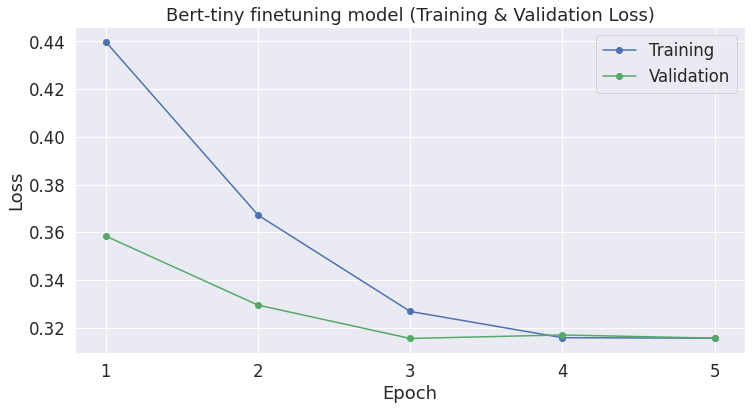

In [30]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot([1,2,3,4,5], training_loss, 'b-o', label="Training")
plt.plot([1,2,3,4,5], validation_loss, 'g-o', label="Validation")

# Label the plot.
plt.title("Bert-tiny finetuning model (Training & Validation Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5])

plt.show()